# Execution of different clique finding algorithms

In [1]:
from libs import *
files = {
    "nc_small" : "graphs/multiple/nc_small_clique.json",
    "sparse_small" : "graphs/multiple/sparse_small_clique.json",
    "dense_small" : "graphs/multiple/dense_small_clique.json",
}

In [2]:
nc_small = files["nc_small"]
G_nc_small = load_graph_from_json(nc_small)
nc_small_largest = set(analyze_graph(G_nc_small))


Graph Analysis:
Number of nodes: 24
Number of edges: 91
Average degree: 7.58
Density: 0.330
Maximum clique: {'18', '12', '11', '10', '17', '14', '15', '9', '16', '13'}


In [3]:
sparse_small = files["sparse_small"]
G_sparse_small = load_graph_from_json(sparse_small)
sparse_small_largest = set(analyze_graph(G_sparse_small))

Graph Analysis:
Number of nodes: 24
Number of edges: 117
Average degree: 9.75
Density: 0.424
Maximum clique: {'18', '12', '10', '11', '17', '14', '15', '9', '16', '13'}


In [4]:
dense_small = files["dense_small"]
G_dense_small = load_graph_from_json(dense_small)
dense_small_largest = set(analyze_graph(G_dense_small))

Graph Analysis:
Number of nodes: 24
Number of edges: 192
Average degree: 16.00
Density: 0.696
Maximum clique: {'18', '10', '11', '12', '17', '14', '15', '9', '16', '13'}


In [27]:
print(f"Size of max clique for nc: {len(nc_small_largest)}")
print(f"Size of max clique for sparse: {len(sparse_small_largest)}")
print(f"Size of max clique for dense: {len(dense_small_largest)}")

Size of max clique for nc: 10
Size of max clique for sparse: 10
Size of max clique for dense: 10


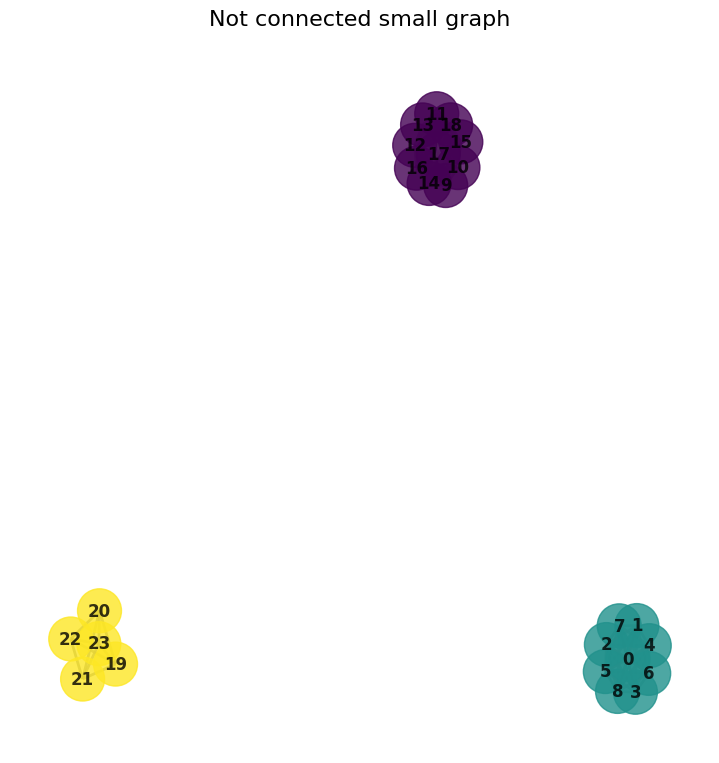

Carraghan-Pardalos experiment
optimized_carraghan_pardalos took 0.0007369029 seconds to execute
Maximum clique 10: {'18', '12', '10', '11', '17', '14', '15', '9', '16', '13'}
CP intersection set 10: {'18', '10', '12', '11', '17', '14', '15', '9', '16', '13'}
----------------------------------------------------------------------------------------------------
Bron-Kerbosh experiment
find_max_clique took 0.0003733449 seconds to execute
Maximum clique 10 <class 'set'>: {'18', '10', '12', '11', '17', '14', '15', '9', '16', '13'}
BK intersection set 10: {'18', '12', '10', '11', '17', '14', '15', '9', '16', '13'}
----------------------------------------------------------------------------------------------------
Tabu-Search experiment
find_maximum_clique took 0.0223913249 seconds to execute
Maximum clique 10: {'18', '12', '10', '11', '17', '14', '15', '9', '16', '13'}
Tabu intersection set 10: {'18', '10', '12', '11', '17', '14', '15', '9', '16', '13'}
----------------------------------------

In [5]:

visualize_graph_customized(G_nc_small, "Not connected small graph", layout="spring", dims=(7, 7))

print("Carraghan-Pardalos experiment")
# cp_solver: CarraghanPardalosCF = CarraghanPardalosCF(G_nc_small)
# nc_small_max_clique_cp: set = cp_solver.find_maximum_clique()
nc_small_max_clique_cp = optimized_carraghan_pardalos(G_nc_small)
nc_small_intersection_set_cp = nc_small_largest.intersection(nc_small_max_clique_cp)

print(f"Maximum clique {len(nc_small_max_clique_cp)}: {nc_small_max_clique_cp}")
print(f"CP intersection set {len(nc_small_intersection_set_cp)}: {nc_small_intersection_set_cp}")
print("-"*100)

print("Bron-Kerbosh experiment")
bk_solver = BronKerbosch(G_nc_small)
nc_small_max_clique_bk: set = bk_solver.find_max_clique()
nc_small_intersection_set_bk = nc_small_largest.intersection(nc_small_max_clique_bk)

print(f"Maximum clique {len(nc_small_max_clique_bk)} {type(nc_small_max_clique_bk)}: {nc_small_max_clique_bk}")
print(f"BK intersection set {len(nc_small_intersection_set_bk)}: {nc_small_intersection_set_bk}")
print("-"*100)


print("Tabu-Search experiment")
tabu_solver: TabuCliqueFinder = TabuCliqueFinder(G_nc_small, tabu_tenure=20, max_iterations=300)
nc_small_max_clique_tabu: set = tabu_solver.find_maximum_clique()
nc_small_intersection_set_tabu = nc_small_largest.intersection(nc_small_max_clique_tabu)

print(f"Maximum clique {len(nc_small_max_clique_tabu)}: {nc_small_max_clique_tabu}")
print(f"Tabu intersection set {len(nc_small_intersection_set_tabu)}: {nc_small_intersection_set_tabu}")
print("-"*100)

In [11]:
nodes: int = G_nc_small.number_of_nodes() 
tabu_tenure: int = nodes // 4

print(f"Nodes: {nodes}")

print("Tabu-Search experiment")
tabu_solver_2: TabuCliqueFinder = TabuCliqueFinder(G_nc_small, tabu_tenure=tabu_tenure, max_iterations=100)
nc_small_max_clique_tabu_2: set = tabu_solver_2.find_maximum_clique()
nc_small_intersection_set_tabu_2 = nc_small_largest.intersection(nc_small_max_clique_tabu_2)

print(f"Maximum clique {len(nc_small_max_clique_tabu_2)}: {nc_small_max_clique_tabu_2}")
print(f"Tabu intersection set {len(nc_small_intersection_set_tabu_2)}: {nc_small_intersection_set_tabu_2}")
print("-"*100)

Nodes: 24
Tabu-Search experiment
find_maximum_clique took 0.0076090959 seconds to execute
Maximum clique 10: {'18', '12', '10', '11', '17', '14', '15', '9', '16', '13'}
Tabu intersection set 10: {'18', '10', '12', '11', '17', '14', '15', '9', '16', '13'}
----------------------------------------------------------------------------------------------------


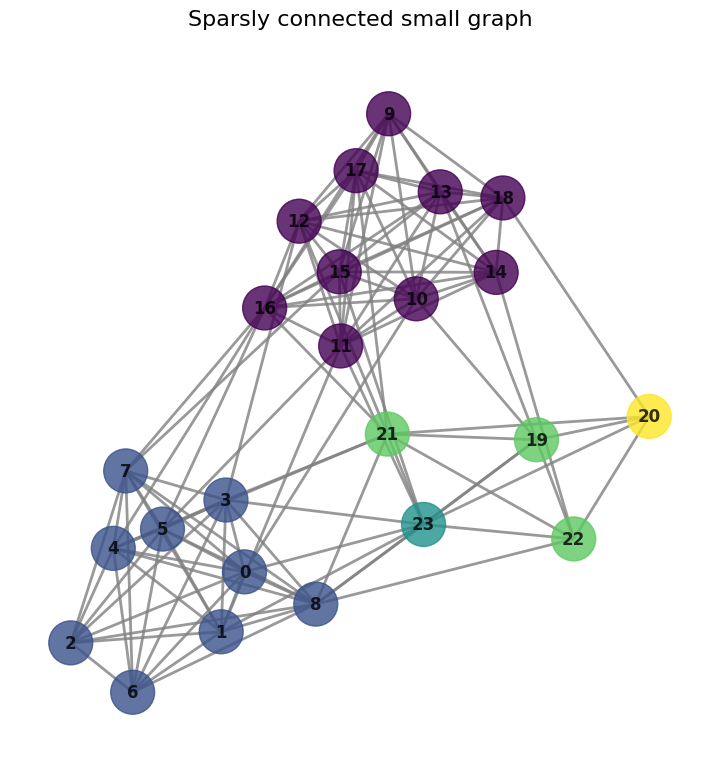

Carraghan-Pardalos experiment
carraghan_pardalos_maximal_clique took 0.0036282830 seconds to execute
Maximum clique 10: {'18', '12', '10', '11', '17', '14', '15', '9', '16', '13'}
CP intersection set 10: {'18', '10', '12', '11', '17', '14', '15', '9', '16', '13'}
----------------------------------------------------------------------------------------------------
Bron-Kerbosh experiment
find_max_clique took 0.0005336350 seconds to execute
Maximum clique 10 <class 'set'>: {'18', '12', '10', '11', '17', '14', '15', '9', '16', '13'}
BK intersection set 10: {'18', '10', '12', '11', '17', '14', '15', '9', '16', '13'}
----------------------------------------------------------------------------------------------------
Tabu-Search experiment
find_maximum_clique took 0.0081613401 seconds to execute
Maximum clique 10: {'18', '12', '10', '11', '17', '14', '15', '9', '16', '13'}
Tabu intersection set 10: {'18', '10', '12', '11', '17', '14', '15', '9', '16', '13'}
-----------------------------------

In [18]:

visualize_graph_customized(G_sparse_small, "Sparsly connected small graph", layout="spring", dims=(7, 7))

print("Carraghan-Pardalos experiment")
# cp_solver: CarraghanPardalosCF = CarraghanPardalosCF(G_sparse_small)
# sparse_small_max_clique_cp: set = cp_solver.find_maximum_clique()
sparse_small_max_clique_cp = carraghan_pardalos_maximal_clique(G_sparse_small)
sparse_small_intersection_set_cp = sparse_small_largest.intersection(sparse_small_max_clique_cp)

print(f"Maximum clique {len(sparse_small_max_clique_cp)}: {sparse_small_max_clique_cp}")
print(f"CP intersection set {len(sparse_small_intersection_set_cp)}: {sparse_small_intersection_set_cp}")
print("-"*100)

print("Bron-Kerbosh experiment")
bk_solver = BronKerbosch(G_sparse_small)
sparse_small_max_clique_bk: set = bk_solver.find_max_clique()
sparse_small_intersection_set_bk = sparse_small_largest.intersection(sparse_small_max_clique_bk)

print(f"Maximum clique {len(sparse_small_max_clique_bk)} {type(sparse_small_max_clique_bk)}: {sparse_small_max_clique_bk}")
print(f"BK intersection set {len(sparse_small_intersection_set_bk)}: {sparse_small_intersection_set_bk}")
print("-"*100)


print("Tabu-Search experiment")
tabu_solver: TabuCliqueFinder = TabuCliqueFinder(G_sparse_small, tabu_tenure=20, max_iterations=100)
sparse_small_max_clique_tabu: set = tabu_solver.find_maximum_clique()
sparse_small_intersection_set_tabu = sparse_small_largest.intersection(sparse_small_max_clique_tabu)

print(f"Maximum clique {len(sparse_small_max_clique_tabu)}: {sparse_small_max_clique_tabu}")
print(f"Tabu intersection set {len(sparse_small_intersection_set_tabu)}: {sparse_small_intersection_set_tabu}")
print("-"*100)

In [20]:
nodes: int = G_sparse_small.number_of_nodes() 
tabu_tenure: int = nodes // 4

print(f"Nodes: {nodes}")

print("Tabu-Search experiment")
tabu_solver_2: TabuCliqueFinder = TabuCliqueFinder(G_sparse_small, tabu_tenure=tabu_tenure, max_iterations=100)
sparse_small_max_clique_tabu_2: set = tabu_solver_2.find_maximum_clique()
sparse_small_intersection_set_tabu_2 = sparse_small_largest.intersection(sparse_small_max_clique_tabu_2)

print(f"Maximum clique {len(sparse_small_max_clique_tabu_2)}: {sparse_small_max_clique_tabu_2}")
print(f"Tabu intersection set {len(sparse_small_intersection_set_tabu_2)}: {sparse_small_intersection_set_tabu_2}")
print("-"*100)

Nodes: 24
Tabu-Search experiment
find_maximum_clique took 0.0082908892 seconds to execute
Maximum clique 10: {'18', '12', '10', '11', '17', '14', '15', '9', '16', '13'}
Tabu intersection set 10: {'18', '10', '12', '11', '17', '14', '15', '9', '16', '13'}
----------------------------------------------------------------------------------------------------


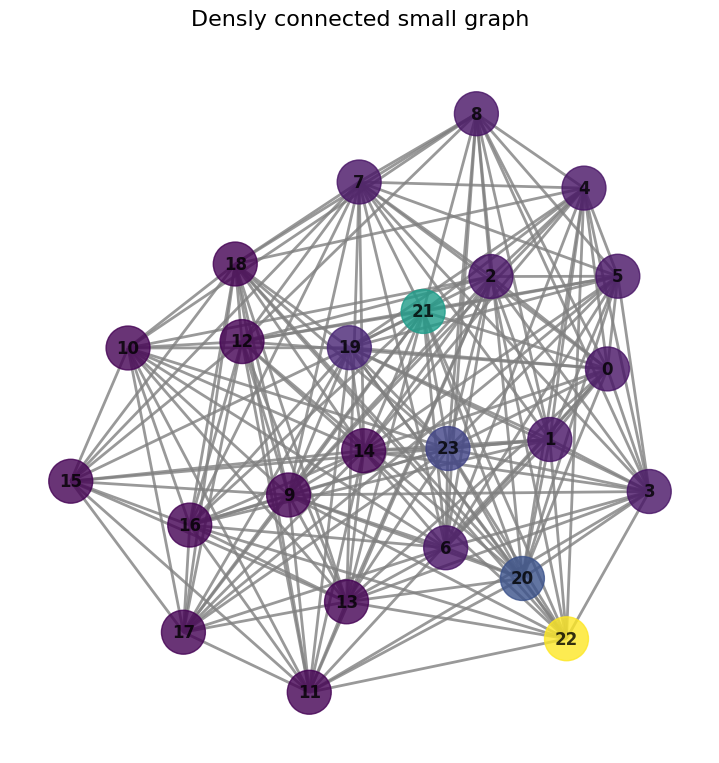

Carraghan-Pardalos experiment
carraghan_pardalos_maximal_clique took 0.0128967932 seconds to execute
Maximum clique 10: {'18', '12', '10', '11', '17', '14', '15', '9', '16', '13'}
CP intersection set 10: {'18', '10', '12', '11', '17', '14', '15', '9', '16', '13'}
----------------------------------------------------------------------------------------------------
Bron-Kerbosh experiment
find_max_clique took 0.0015588959 seconds to execute
Maximum clique 10 <class 'set'>: {'18', '10', '12', '11', '17', '14', '15', '9', '16', '13'}
BK intersection set 10: {'18', '12', '10', '11', '17', '14', '15', '9', '16', '13'}
----------------------------------------------------------------------------------------------------
Tabu-Search experiment
find_maximum_clique took 0.0101905919 seconds to execute
Maximum clique 10: {'18', '12', '10', '11', '17', '14', '15', '9', '16', '13'}
Tabu intersection set 10: {'18', '10', '12', '11', '17', '14', '15', '9', '16', '13'}
-----------------------------------

In [25]:
visualize_graph_customized(G_dense_small, "Densly connected small graph", layout="spring", dims=(7, 7))

print("Carraghan-Pardalos experiment")
# cp_solver: CarraghanPardalosCF = CarraghanPardalosCF(G_dense_small)
# dense_small_max_clique_cp: set = cp_solver.find_maximum_clique()
dense_small_max_clique_cp = carraghan_pardalos_maximal_clique(G_dense_small)
dense_small_intersection_set_cp = dense_small_largest.intersection(dense_small_max_clique_cp)

print(f"Maximum clique {len(dense_small_max_clique_cp)}: {dense_small_max_clique_cp}")
print(f"CP intersection set {len(dense_small_intersection_set_cp)}: {dense_small_intersection_set_cp}")
print("-"*100)

print("Bron-Kerbosh experiment")
bk_solver = BronKerbosch(G_dense_small)
dense_small_max_clique_bk: set = bk_solver.find_max_clique()
dense_small_intersection_set_bk = dense_small_largest.intersection(dense_small_max_clique_bk)

print(f"Maximum clique {len(dense_small_max_clique_bk)} {type(dense_small_max_clique_bk)}: {dense_small_max_clique_bk}")
print(f"BK intersection set {len(dense_small_intersection_set_bk)}: {dense_small_intersection_set_bk}")
print("-"*100)

print("Tabu-Search experiment")
tabu_solver: TabuCliqueFinder = TabuCliqueFinder(G_dense_small, tabu_tenure=20, max_iterations=100)
dense_small_max_clique_tabu: set = tabu_solver.find_maximum_clique()
dense_small_intersection_set_tabu = dense_small_largest.intersection(dense_small_max_clique_tabu)

print(f"Maximum clique {len(dense_small_max_clique_tabu)}: {dense_small_max_clique_tabu}")
print(f"Tabu intersection set {len(dense_small_intersection_set_tabu)}: {dense_small_intersection_set_tabu}")
print("-"*100)

In [24]:
nodes: int = G_dense_small.number_of_nodes() 
tabu_tenure: int = nodes // 4

print(f"Nodes: {nodes}")

print("Tabu-Search experiment")
tabu_solver_2: TabuCliqueFinder = TabuCliqueFinder(G_sparse_small, tabu_tenure=tabu_tenure, max_iterations=100)
dense_small_max_clique_tabu_2: set = tabu_solver_2.find_maximum_clique()
dense_small_intersection_set_tabu_2 = dense_small_largest.intersection(dense_small_max_clique_tabu_2)

print(f"Maximum clique {len(dense_small_max_clique_tabu_2)}: {dense_small_max_clique_tabu_2}")
print(f"Tabu intersection set {len(dense_small_intersection_set_tabu_2)}: {dense_small_intersection_set_tabu_2}")
print("-"*100)

Nodes: 24
Tabu-Search experiment
find_maximum_clique took 0.0101522510 seconds to execute
Maximum clique 10: {'18', '12', '10', '11', '17', '14', '15', '9', '16', '13'}
Tabu intersection set 10: {'18', '10', '12', '11', '17', '14', '15', '9', '16', '13'}
----------------------------------------------------------------------------------------------------
